### Selecionando, filtrando e salvando shapes

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
# Função para abrir shapefile
def open_shape():
    # Lendo e plotando o arquivo com a borda preta
    path = input('Digite o caminho para a shapefile desejada: ') + '\\'
    name = input('Digite o nome da shapefile: ') + '.shp'
    shp = gpd.read_file(path + name)
    
    return [shp, shp.plot(edgecolor = 'lightgray')]

# Função para filtrar a shape e salvar/plotar
def sel_save(shape):
    # Informando as colunas e valores do arquivo
    print(f'As colunas do arquivo selecionado são:\n {shape}')
    esc = input('Digite a coluna a ser filtrada: ')
    # Selecionando e criando uma nova coluna para o filtro escolhido pelo usuário
    shape['esc'] = shape[esc]
    # Transformando os valores da coluna em lista
    filtro = shape.esc.values
    # Estrutura de repetição para plotar os valores selecionados pelo usuário
    while True:
        plus = input('Deseja escolher algum valor para filtrar? [S/N]').strip().upper()[0]
        while 'N' not in plus and 'S' not in plus:
            plus = input('Escolha errada! Digite S ou N para escolher algum valor para filtrar: ').strip().upper()[0]
        if plus == 'S':
            f2 = input('Digite o valor para filtrar: ')
            if f2.isnumeric():
                f2 = int(f2)
            filtro = shape[shape[esc]==f2]
            filtro.plot()
            break
        else:
            break   
    # Estrutura de repetição para salvar os filtros realizados pelo usuário
    while True:
        sel = input('Deseja salvar a camada? [S/N]').strip().upper()[0]
        while 'N' not in sel and 'S' not in sel:
            sel = input('Escolha errada! Digite S ou N para salvar ou não a camada filtrada: ').strip().upper()[0]
        if sel == 'N':
            break
        shp_save = input('Digite o caminho para salvar os arquivos: ')
        if sel == 'S' and plus == 'S':
            filtro.to_file(shp_save + '\\' + str(f2) + '.shp')
        elif plus == 'N':
            for s in filtro:
                salvar = shape[shape[esc]==s]
                salvar.to_file(shp_save + '\\' + str(s) + '.shp') 
        break
    return

# Função de execução do código
def run():
    arq = open_shape()[0]
    save = sel_save(arq)

Digite o caminho para a shapefile desejada:  C:\Users\rodri\Downloads\RS
Digite o nome da shapefile:  RS


As colunas do arquivo selecionado são:
       CD_MUN                 NM_MUN SIGLA_UF   AREA_KM2 esc  \
0    4300001            Lagoa Mirim       RS   2884.340  RS   
1    4300002        Lagoa dos Patos       RS  10201.524  RS   
2    4300034                 Aceguá       RS   1551.339  RS   
3    4300059             Água Santa       RS    291.503  RS   
4    4300109                  Agudo       RS    534.624  RS   
..       ...                    ...      ...        ...  ..   
494  4323606  Vista Alegre do Prata       RS    119.327  RS   
495  4323705           Vista Gaúcha       RS     90.022  RS   
496  4323754    Vitória das Missões       RS    258.312  RS   
497  4323770              Westfália       RS     63.665  RS   
498  4323804              Xangri-lá       RS     60.756  RS   

                                              geometry  
0    POLYGON ((-52.62752 -32.15022, -52.62816 -32.1...  
1    POLYGON ((-52.09720 -32.16167, -52.09926 -32.1...  
2    POLYGON ((-54.21884 -31.829

Digite a coluna a ser filtrada:  NM_MUN
Deseja escolher algum valor para filtrar? [S/N] s
Digite o valor para filtrar:  Panambi
Deseja salvar a camada? [S/N] s
Digite o caminho para salvar os arquivos:  C:\Users\rodri\Downloads\RS


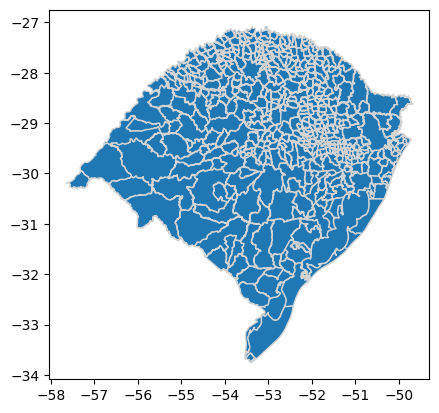

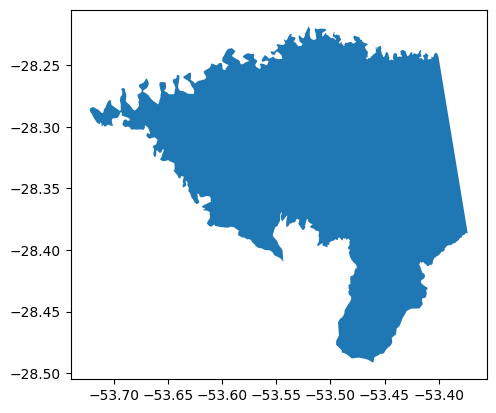

In [4]:
run()